# Politicules Panel Regression - Happiness
# 1. Data exploration

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
sing_df = pd.read_csv('happiness_politicules_values_df_clean_raw.csv')
sing_df

,F063,E033,A170,E023,A006,A001,E069_11,E069_12,D059,A008,...,A029,A041,A042,A003,A035,A034,X003,X025R,wave,COUNTRY_ALPHA
0,10.0,2.0,3.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,...,1.0,0.0,1.0,2.0,1.0,0.0,18.0,2.0,3,ALB
1,8.0,8.0,9.0,3.0,2.0,1.0,3.0,3.0,1.0,2.0,...,0.0,0.0,1.0,2.0,0.0,0.0,18.0,2.0,3,ALB
2,9.0,5.0,4.0,4.0,1.0,1.0,3.0,3.0,4.0,3.0,...,1.0,0.0,1.0,2.0,1.0,0.0,24.0,1.0,3,ALB
3,9.0,3.0,7.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,26.0,2.0,3,ALB
4,10.0,4.0,5.0,4.0,1.0,1.0,3.0,3.0,1.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,30.0,1.0,3,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443483,6.0,10.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,43.0,1.0,7,ZWE
443484,10.0,10.0,5.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,...,0.0,0.0,0.0,2.0,1.0,0.0,34.0,3.0,7,ZWE
443485,10.0,10.0,5.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,...,0.0,1.0,1.0,2.0,0.0,0.0,22.0,1.0,7,ZWE
443486,10.0,1.0,4.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0,...,1.0,0.0,0.0,2.0,1.0,0.0,48.0,1.0,7,ZWE


In [18]:
agg_df = pd.read_csv('happiness_politicules_values_df_clean_final.csv')
agg_df

,wave,COUNTRY_ALPHA,F063,E033,A170,E023,A006,A001,E069_11,E069_12,...,E114,E124,G006,X003R,A029,A041,A042,A003,A035,A034
0,1,ARG,7.001032,5.261830,6.770021,0.090547,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.462687,0.172139,0.416915,0.069652,0.186070,0.000000,0.439801,0.224876
1,1,AUS,6.165568,5.767713,7.894780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.650651,0.210098,0.245114,0.377036,0.411238,0.000000,0.671010,0.133550
2,1,FIN,5.598570,5.854610,7.905812,0.089731,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.381854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,HUN,4.837684,NaN,6.927235,0.115437,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.644126,0.000000,0.508197,0.140710,0.306694,0.000000,0.307377,0.071721
4,1,JPN,4.787256,6.039943,6.579316,0.036545,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.279900,0.218439,0.467608,0.280731,0.061462,0.000000,0.410299,0.112126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,7,USA,6.717611,5.220733,7.222222,0.229969,0.330894,0.892142,0.073190,0.015023,...,0.107858,0.119800,0.413713,0.110555,0.552388,0.295840,0.199538,0.387904,0.692989,0.338983
302,7,UZB,8.674361,NaN,6.960664,0.256800,0.448000,0.928000,0.463200,0.274400,...,0.387200,0.460000,0.838400,0.190400,0.488800,0.316000,0.148800,0.268000,0.588800,0.267200
303,7,VEN,9.110084,6.288235,7.016807,0.072269,0.392437,0.834454,0.040336,0.025210,...,0.252941,0.116807,0.784874,0.226050,0.354622,0.285714,0.689916,0.436134,0.698319,0.168908
304,7,VNM,6.027500,NaN,8.025833,0.125000,0.122500,0.968333,0.354167,0.266667,...,0.309167,0.341667,0.594167,0.164167,0.415833,0.407500,0.550833,0.128333,0.463333,0.261667


In [19]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wave           306 non-null    int64  
 1   COUNTRY_ALPHA  306 non-null    object 
 2   F063           295 non-null    float64
 3   E033           274 non-null    float64
 4   A170           304 non-null    float64
 5   E023           306 non-null    float64
 6   A006           306 non-null    float64
 7   A001           306 non-null    float64
 8   E069_11        306 non-null    float64
 9   E069_12        306 non-null    float64
 10  D059           306 non-null    float64
 11  A008           306 non-null    float64
 12  E012           306 non-null    float64
 13  E114           306 non-null    float64
 14  E124           306 non-null    float64
 15  G006           306 non-null    float64
 16  X003R          306 non-null    float64
 17  A029           306 non-null    float64
 18  A041      

# 2. Data cleaning

In [20]:
zero_means_missing = [
    'A006', 'A001', 'A003', 'A029', 'A041', 'A042', 'A035', 'A034',  # value-related
    'X003R', 'E033', 'E023', 'E069_11', 'E069_12',  # other belief/value metrics
]


In [21]:
import numpy as np

agg_df[zero_means_missing] = agg_df[zero_means_missing].replace(0.0, np.nan)


In [22]:
# Example: drop rows where DV or any main IV is missing
cols_to_check = ['A170'] + zero_means_missing
agg_df = agg_df.dropna(subset=cols_to_check)


In [23]:
print(agg_df.shape)
print(agg_df.isna().sum())


(250, 23)
wave             0
COUNTRY_ALPHA    0
F063             4
E033             0
A170             0
E023             0
A006             0
A001             0
E069_11          0
E069_12          0
D059             0
A008             0
E012             0
E114             0
E124             0
G006             0
X003R            0
A029             0
A041             0
A042             0
A003             0
A035             0
A034             0
dtype: int64


# 3. Fixed Effects Panel Regression

In [ ]:
#%pip install linearmodels


  Obtaining dependency information for linearmodels from https://files.pythonhosted.org/packages/b2/2d/fa7774f1e340655cbb26dc2dd09e6e4e1e989ee05cc43395ed5e9e6fc83e/linearmodels-6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pyhdfe>=0.1 from https://files.pythonhosted.org/packages/2f/51/cb006fbc08c32f161035fb19ca718250eb5f6d0692ea6dcc1e62c3e556a2/pyhdfe-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for formulaic>=1.0.0 from https://files.pythonhosted.org/packages/d2/c2/a34097e53efe70a538ae97574ff9e9866e60fc1c792c19da5fd6b56ce7b5/formulaic-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools-scm[toml]<9.0.0,>=8.0.0 from https://files.pythonhosted.org/packages/10/7c/5a9799042320242c383c4485a2771a37d49e8ce2312ca647653d2fd1a7a4/setuptools_scm-8.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for interface-meta>=1.2.0 from https://files.pythonhosted.org/packages/02/3f/a6ec28c88e2d8e54d32

In [25]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Set panel index: country + wave
agg_df = agg_df.set_index(['COUNTRY_ALPHA', 'wave'])

# Define your DV and IVs
y = agg_df['A170']  # life satisfaction

# Choose your predictors
X = agg_df[['A006', 'A001', 'A003', 'A029', 'A041', 'A042', 'A035', 'A034', 'X003R']]

# Add constant term
X = sm.add_constant(X)

# Run Fixed Effects model
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

# Print summary
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   A170   R-squared:                        0.2118
Estimator:                   PanelOLS   R-squared (Between):             -0.2175
No. Observations:                 250   R-squared (Within):               0.2118
Date:                Mon, Mar 31 2025   R-squared (Overall):             -0.1645
Time:                        15:04:44   Log-likelihood                   -104.89
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.1510
Entities:                         102   P-value                           0.0001
Avg Obs:                       2.4510   Distribution:                   F(9,139)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             4.1510
                            

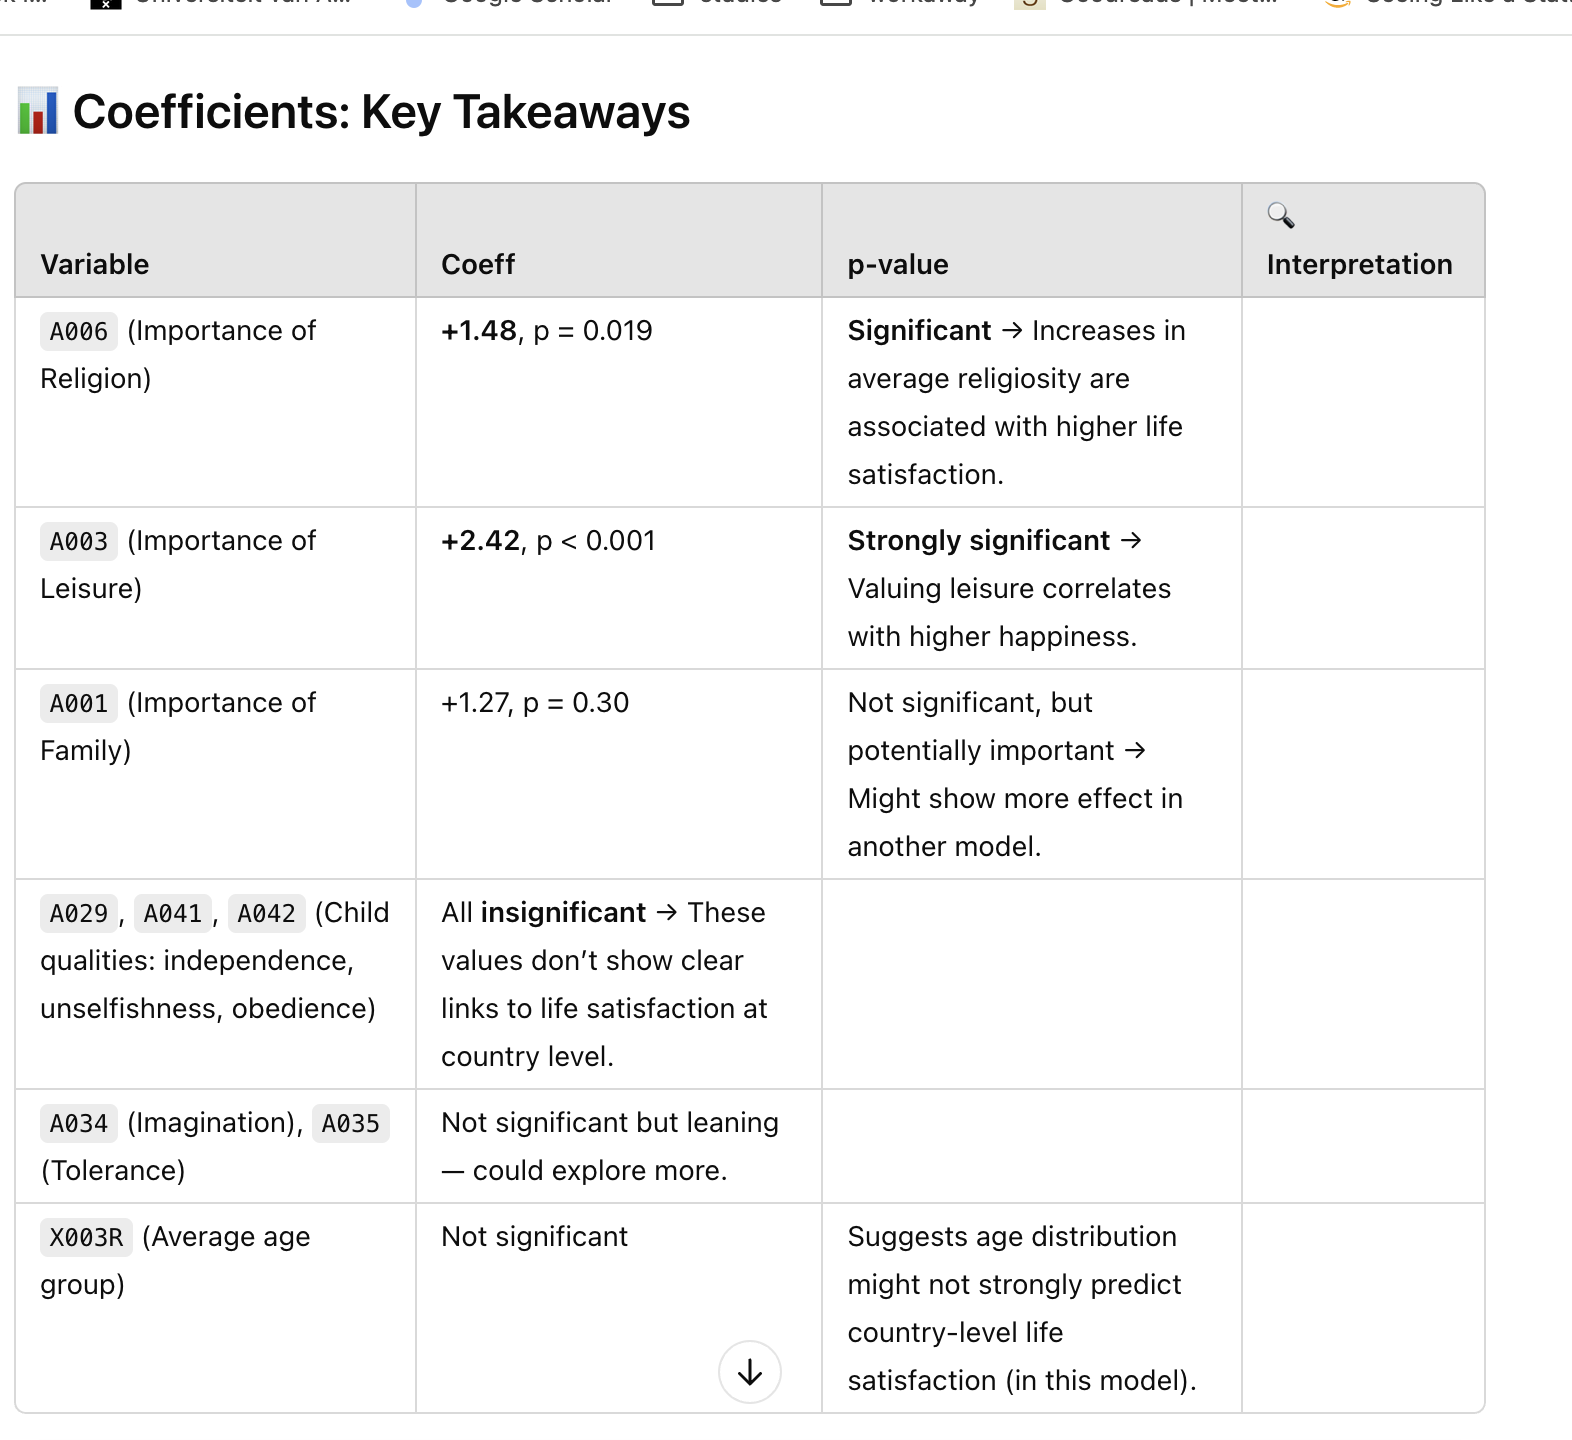

In [26]:
# Create wave dummies
wave_dummies = pd.get_dummies(agg_df.reset_index()['wave'], prefix='wave', drop_first=True)
X = X.join(wave_dummies.set_index(agg_df.index))


In [29]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Set panel index: country + wave
#agg_df = agg_df.set_index(['COUNTRY_ALPHA', 'wave'])

# Define your DV and IVs
y = agg_df['A170']  # life satisfaction

# Add constant term
X = sm.add_constant(X)

# Run Fixed Effects model
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

# Print summary
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   A170   R-squared:                        0.5114
Estimator:                   PanelOLS   R-squared (Between):             -1.6893
No. Observations:                 250   R-squared (Within):               0.5114
Date:                Mon, Mar 31 2025   R-squared (Overall):             -1.3013
Time:                        15:08:26   Log-likelihood                   -45.118
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      10.018
Entities:                         102   P-value                           0.0000
Avg Obs:                       2.4510   Distribution:                  F(14,134)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             10.018
                            

Text(0.5, 1.0, 'Importance of Leisure vs Life Satisfaction')

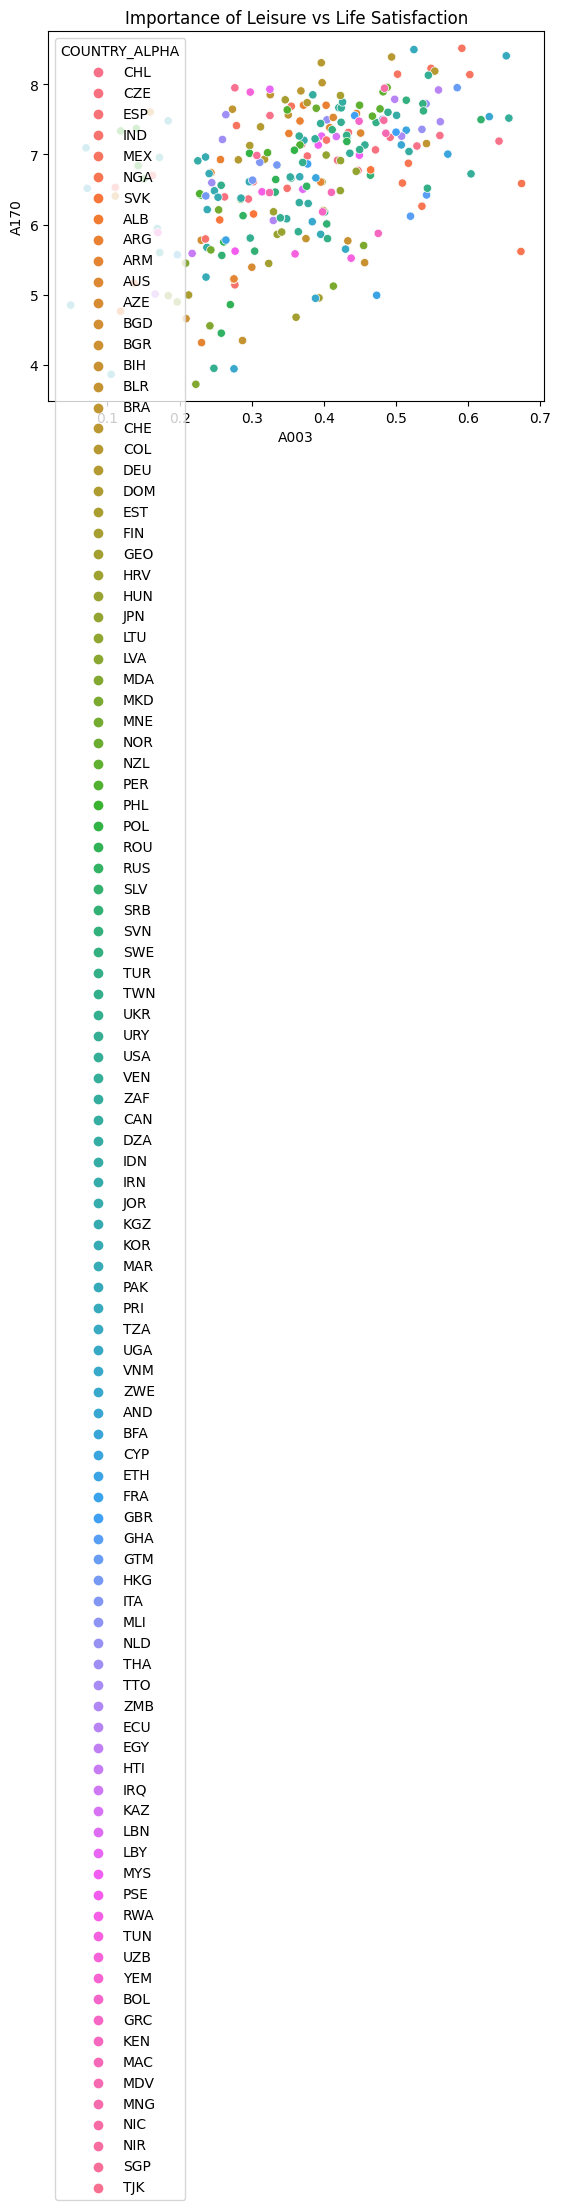

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=agg_df.reset_index(), x='A003', y='A170', hue='COUNTRY_ALPHA')
plt.title("Importance of Leisure vs Life Satisfaction")


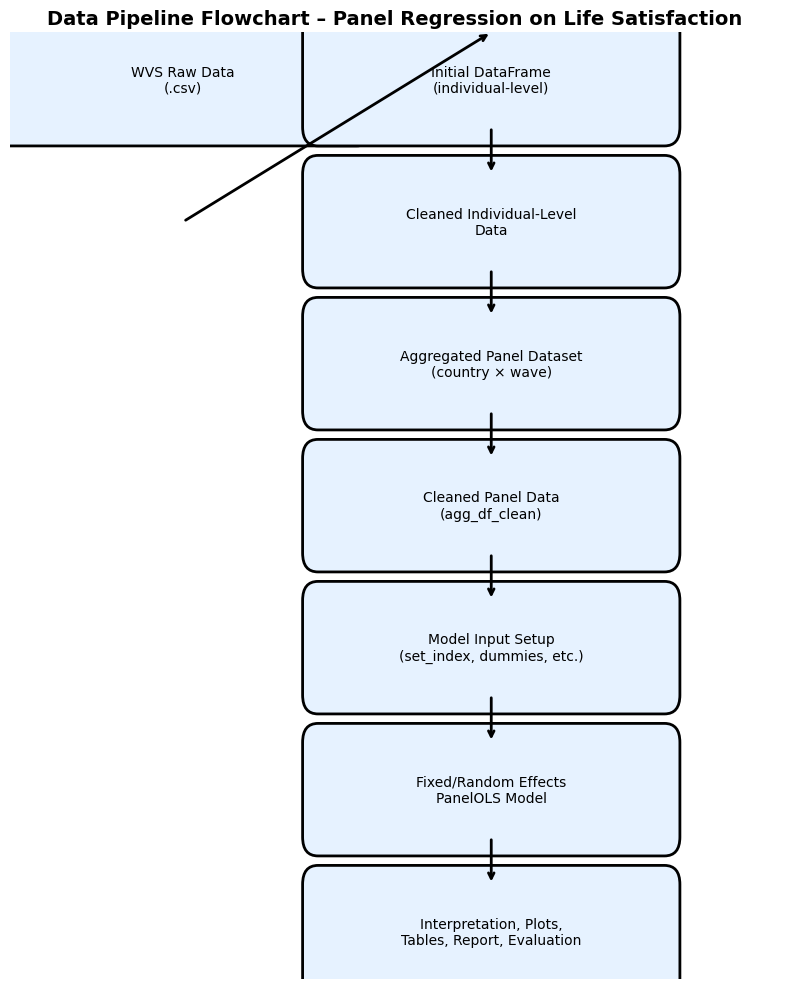

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('off')

# Define boxes and their positions
boxes = {
    "raw_data": ("WVS Raw Data\n(.csv)", (0.0, 0.8)),
    "initial_df": ("Initial DataFrame\n(individual-level)", (0.4, 0.9)),
    "cleaned_indiv": ("Cleaned Individual-Level\nData", (0.4, 0.75)),
    "agg_df": ("Aggregated Panel Dataset\n(country × wave)", (0.4, 0.6)),
    "agg_clean": ("Cleaned Panel Data\n(agg_df_clean)", (0.4, 0.45)),
    "model_ready": ("Model Input Setup\n(set_index, dummies, etc.)", (0.4, 0.3)),
    "panel_model": ("Fixed/Random Effects\nPanelOLS Model", (0.4, 0.15)),
    "output": ("Interpretation, Plots,\nTables, Report, Evaluation", (0.4, 0.0))
}

# Draw rectangles
for key, (label, (x, y)) in boxes.items():
    if key == "raw_data":
        y += 0.1  # Adjust the y-position of the first box to avoid overlap
    ax.add_patch(patches.FancyBboxPatch(
        (x, y), 0.45, 0.1,
        boxstyle="round,pad=0.02",
        edgecolor='black',
        facecolor='#e6f2ff',
        linewidth=2
    ))
    ax.text(x + 0.225, y + 0.05, label, va='center', ha='center', fontsize=10)

# Arrows between steps
arrows = [
    ("raw_data", "initial_df"),
    ("initial_df", "cleaned_indiv"),
    ("cleaned_indiv", "agg_df"),
    ("agg_df", "agg_clean"),
    ("agg_clean", "model_ready"),
    ("model_ready", "panel_model"),
    ("panel_model", "output")
]

for start, end in arrows:
    _, (x1, y1) = boxes[start]
    _, (x2, y2) = boxes[end]
    ax.annotate('', xy=(x2 + 0.225, y2 + 0.1), xytext=(x1 + 0.225, y1),
                arrowprops=dict(arrowstyle="->", lw=2))

plt.title("Data Pipeline Flowchart – Panel Regression on Life Satisfaction", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


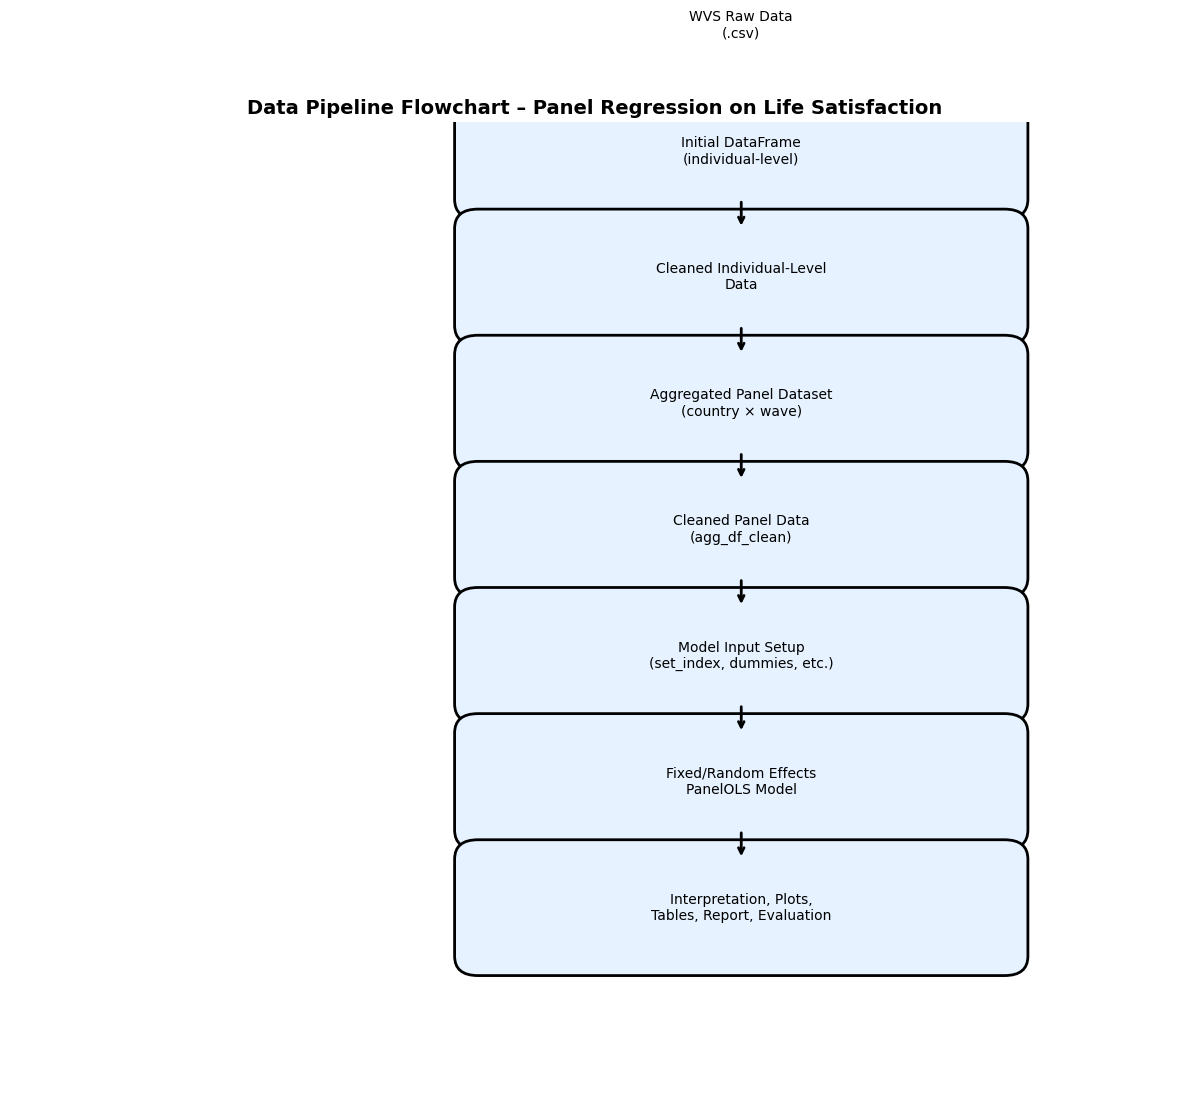

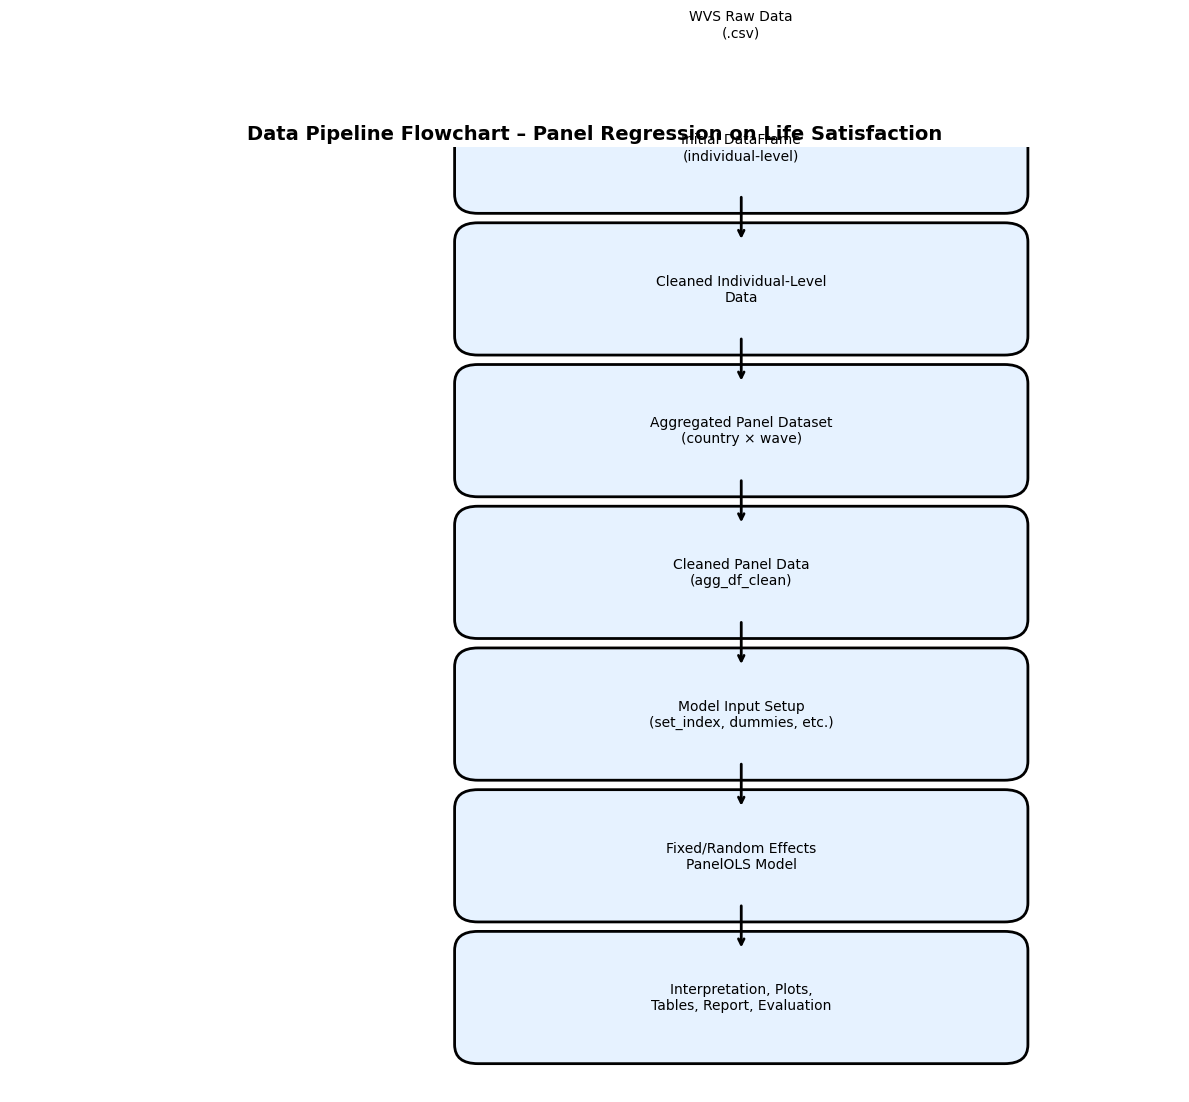

In [35]:
# Adjusting the first "WVS Raw Data" box to align and scale like the others

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 11))
ax.axis('off')

# Define boxes and their positions (all boxes now vertically stacked)
boxes = {
    "raw_data": ("WVS Raw Data\n(.csv)", (0.4, 1.08)),  # Adjusted y-position slightly
    "initial_df": ("Initial DataFrame\n(individual-level)", (0.4, 0.95)),
    "cleaned_indiv": ("Cleaned Individual-Level\nData", (0.4, 0.80)),
    "agg_df": ("Aggregated Panel Dataset\n(country × wave)", (0.4, 0.65)),
    "agg_clean": ("Cleaned Panel Data\n(agg_df_clean)", (0.4, 0.50)),
    "model_ready": ("Model Input Setup\n(set_index, dummies, etc.)", (0.4, 0.35)),
    "panel_model": ("Fixed/Random Effects\nPanelOLS Model", (0.4, 0.20)),
    "output": ("Interpretation, Plots,\nTables, Report, Evaluation", (0.4, 0.05))
}

# Draw rectangles
for key, (label, (x, y)) in boxes.items():
    ax.add_patch(patches.FancyBboxPatch(
        (x, y), 0.45, 0.1,
        boxstyle="round,pad=0.02",
        edgecolor='black',
        facecolor='#e6f2ff',
        linewidth=2
    ))
    ax.text(x + 0.225, y + 0.05, label, va='center', ha='center', fontsize=10)

# Arrows between steps
arrow_order = list(boxes.keys())
for i in range(len(arrow_order) - 1):
    _, (x1, y1) = boxes[arrow_order[i]]
    _, (x2, y2) = boxes[arrow_order[i + 1]]
    ax.annotate('', xy=(x2 + 0.225, y2 + 0.1), xytext=(x1 + 0.225, y1),
                arrowprops=dict(arrowstyle="->", lw=2))

plt.title("Data Pipeline Flowchart – Panel Regression on Life Satisfaction", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
